# Prepare data for climpact (temperature part) 

In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# List of your CSV files
file_names = [
    "lys_02_temp.csv", "lys_05_temp.csv", "lys_07_temp.csv", 
    "lys_08_temp.csv", "lys_09_temp.csv", "lys_12_temp.csv"
]

files_location = "../data_ecotron/"

# Dictionary to store data with dome as the key
dome_data = {}

# Read each file and store the data
for file in file_names:
    # Read the CSV file
    data = pd.read_csv(files_location+file)

    # Extract the dome name from the file name (assuming it's the number after 'lys_')
    dome_name = 'dome_' + file.split('_')[1]

    # Store the date and temp columns in the dictionary
    dome_data[dome_name] = data[['date', 'temp']]

# Now each dome's data is stored in the dome_data dictionary
# For example, to access the data for dome_02, use dome_data['dome_02']

# Assuming dome_data is already defined and populated with data
# Example: dome_data = {'dome_02': pd.DataFrame(...), 'dome_05': pd.DataFrame(...), ...}

# Define the cutoff date
cutoff_date = pd.to_datetime('2020-01-01')

# Iterate over each dome's data and filter out the dates before the cutoff date
for dome_name in dome_data:
    # Convert 'date' to datetime if it's not already
    dome_data[dome_name]['date'] = pd.to_datetime(dome_data[dome_name]['date'])

    # Filter the data
    dome_data[dome_name] = dome_data[dome_name][dome_data[dome_name]['date'] >= cutoff_date]

# Now dome_data contains only entries on or after January 1st, 2020



In [40]:
# Assuming dome_data is already defined and populated with data
# Example: dome_data = {'dome_02': pd.DataFrame(...), 'dome_05': pd.DataFrame(...), ...}

for dome_name in dome_data:
    # Ensure 'date' is in datetime format and set it as index
    dome_data[dome_name]['date'] = pd.to_datetime(dome_data[dome_name]['date'])
    dome_data[dome_name].set_index('date', inplace=True)

    # Resample the data to get hourly averages
    dome_data[dome_name] = dome_data[dome_name].resample('H').mean()

    # Reset the index if you want 'date' as a column
    dome_data[dome_name].reset_index(inplace=True)

# Now dome_data contains hourly averaged temperature data for each dome


In [41]:
import pandas as pd

# Assuming dome_data is already defined and contains hourly data
# Example: dome_data = {'dome_02': pd.DataFrame(...), 'dome_05': pd.DataFrame(...), ...}

# Dictionary to store the daily stats for each dome
daily_stats = {}

for dome_name, data in dome_data.items():
    # Ensure 'date' is in datetime format and set it as index
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    # Resample to daily and calculate mean, min, and max
    daily_data = data.resample('D').agg({'temp': ['mean', 'min', 'max']})

    # Flatten the column hierarchy
    daily_data.columns = ['mean_temp', 'min_temp', 'max_temp']

    # Store in the dictionary
    daily_stats[dome_name] = daily_data

# Now daily_stats contains a DataFrame for each dome with daily mean, min, and max temperatures


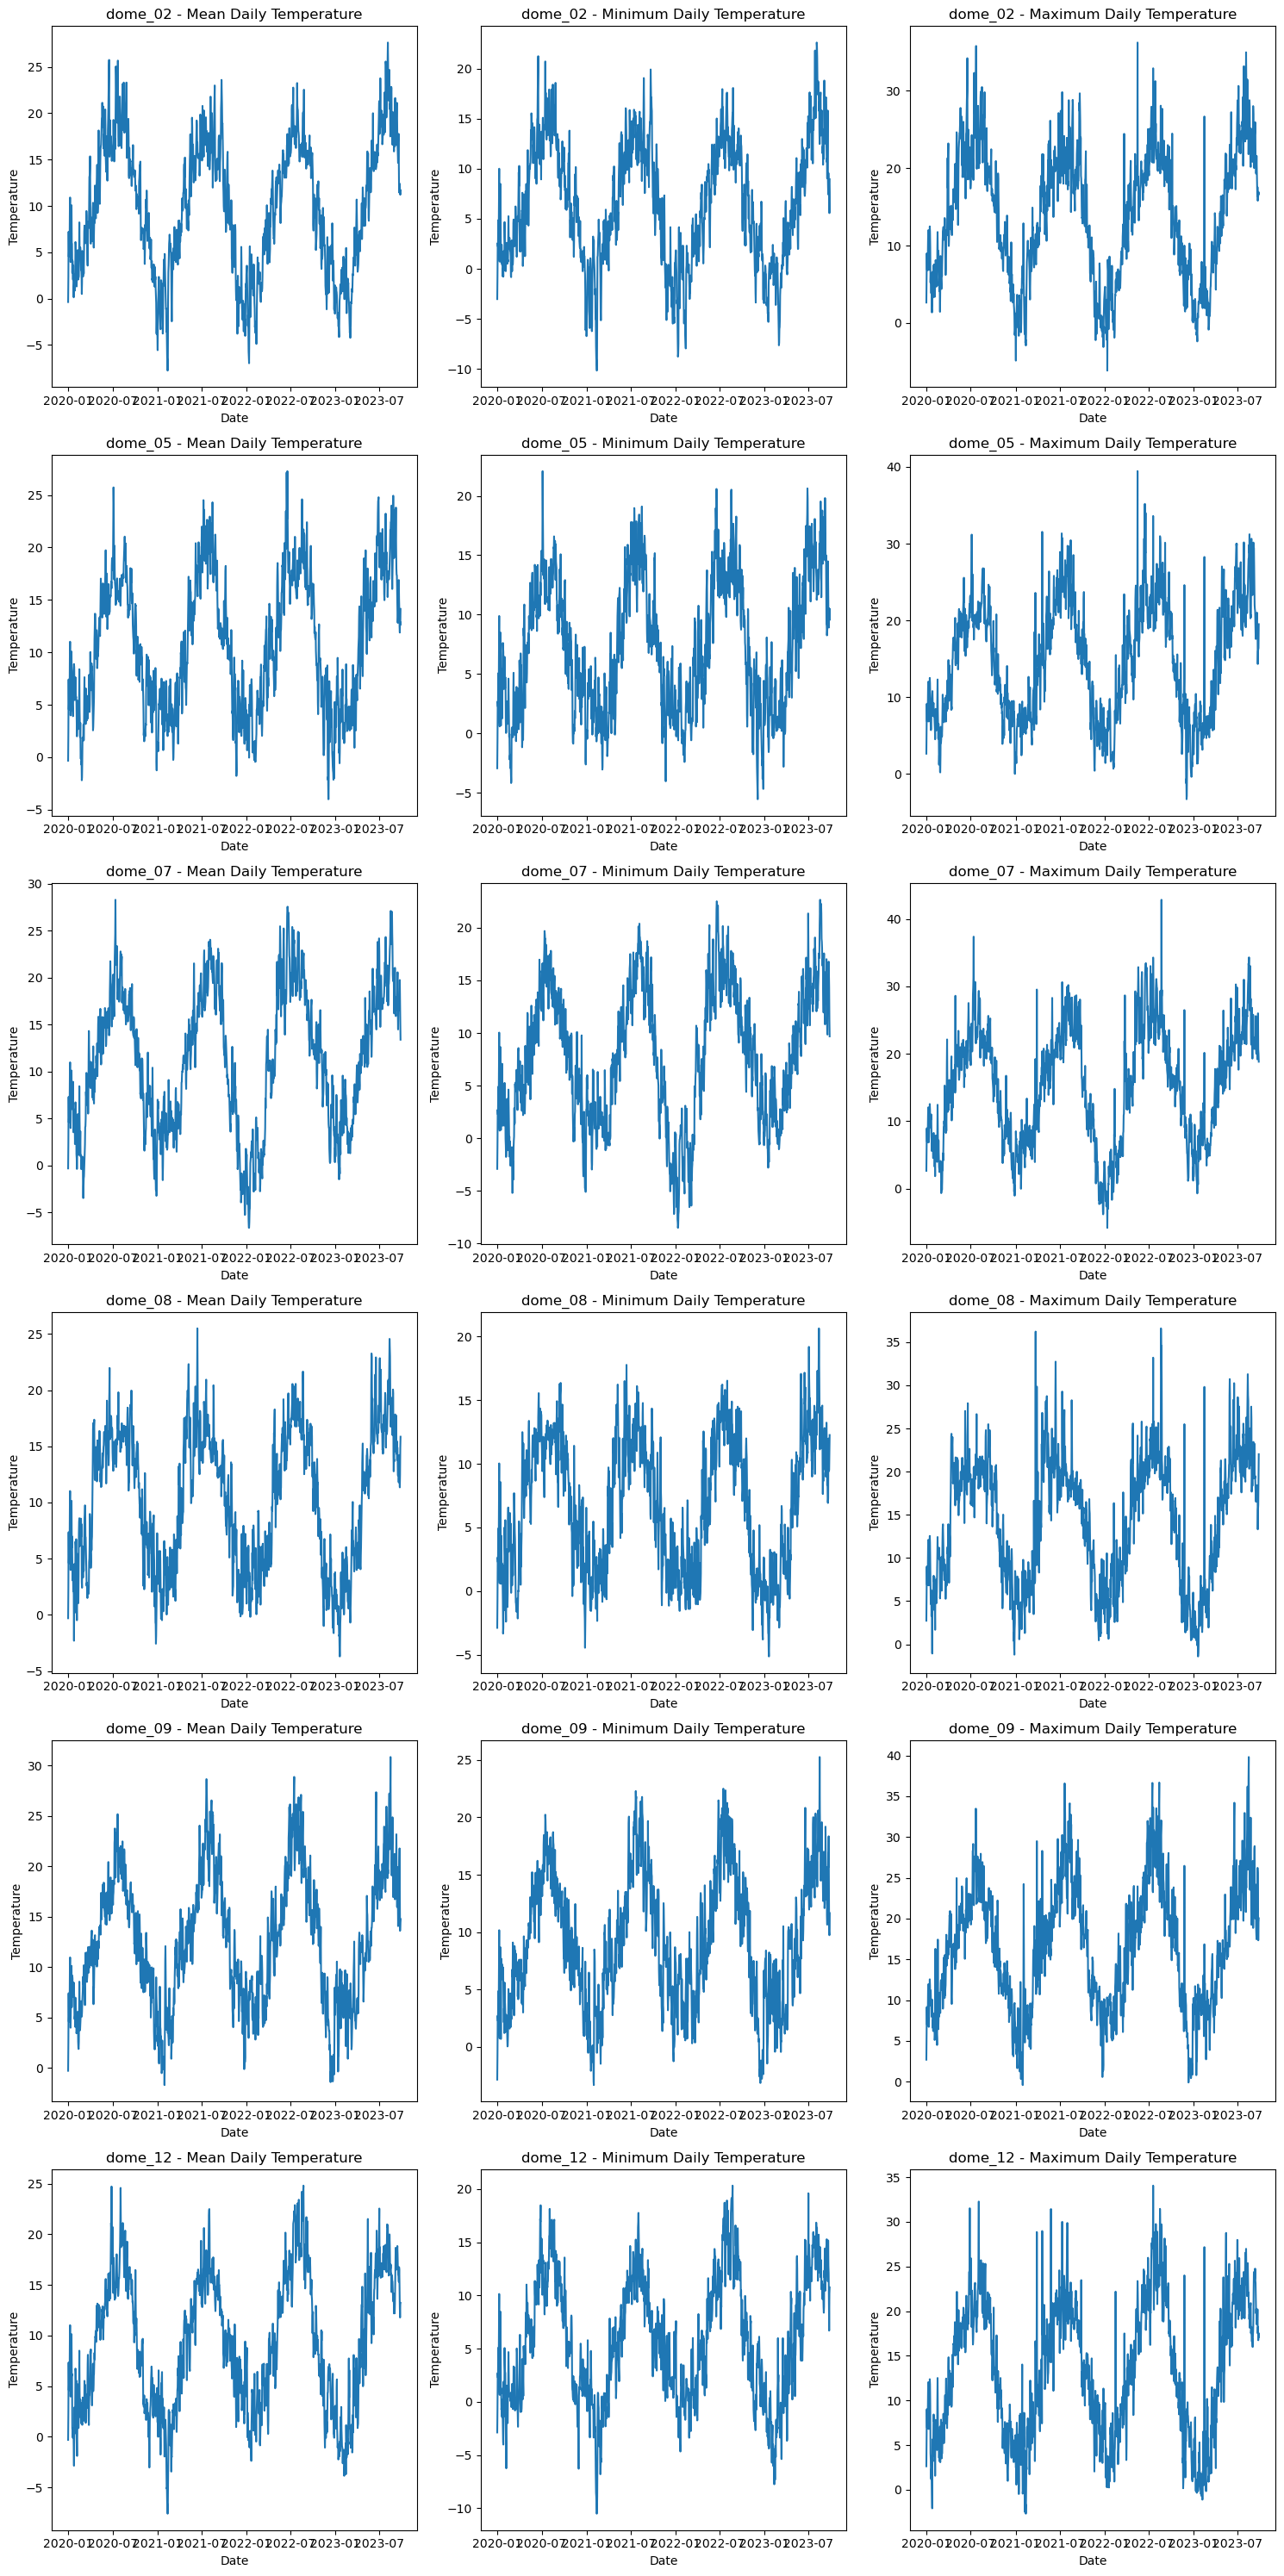

In [42]:
import matplotlib.pyplot as plt

# Assuming daily_stats is already defined and contains the daily mean, min, and max temperatures for each dome
# Example: daily_stats = {'dome_02': pd.DataFrame(...), 'dome_05': pd.DataFrame(...), ...}

# Number of domes
num_domes = len(daily_stats)

# Create a figure with subplots - 3 columns for each temperature type and rows equal to the number of domes
fig, axs = plt.subplots(num_domes, 3, figsize=(15, 5 * num_domes))

# In case there's only one dome, wrap axs in a list
if num_domes == 1:
    axs = [axs]

# Iterate through each dome and plot the data
for i, (dome_name, data) in enumerate(daily_stats.items()):
    # Plot mean daily temperature
    axs[i, 0].plot(data.index, data['mean_temp'])
    axs[i, 0].set_title(f'{dome_name} - Mean Daily Temperature')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Temperature')

    # Plot minimum daily temperature
    axs[i, 1].plot(data.index, data['min_temp'])
    axs[i, 1].set_title(f'{dome_name} - Minimum Daily Temperature')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Temperature')

    # Plot maximum daily temperature
    axs[i, 2].plot(data.index, data['max_temp'])
    axs[i, 2].set_title(f'{dome_name} - Maximum Daily Temperature')
    axs[i, 2].set_xlabel('Date')
    axs[i, 2].set_ylabel('Temperature')

# Adjust layout for better display
plt.tight_layout()
plt.show()


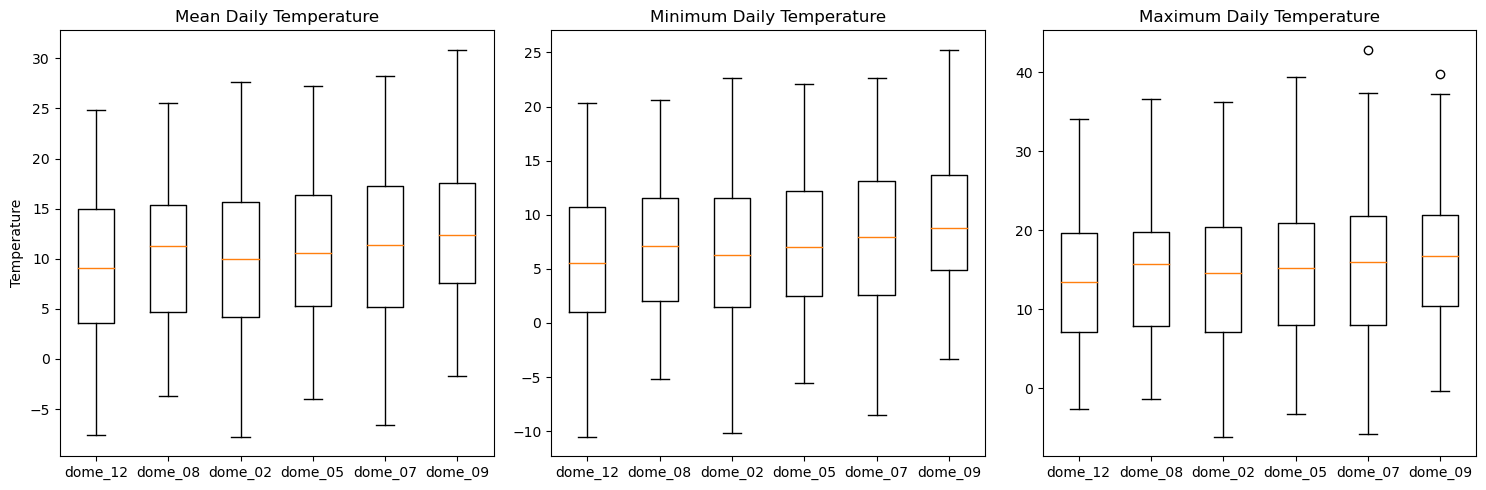

In [43]:
import matplotlib.pyplot as plt

# Assuming daily_stats is defined with DataFrames for each dome
# Example: daily_stats = {'dome_02': pd.DataFrame(...), 'dome_05': pd.DataFrame(...), ...}

# Specific order for the domes
dome_order = ['dome_12', 'dome_08', 'dome_02', 'dome_05', 'dome_07', 'dome_09']

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Function to create a list of data for box plots in specified dome order
def get_data_for_boxplot(metric):
    return [daily_stats[dome][metric].dropna() for dome in dome_order if dome in daily_stats]

# Plot box plots for mean daily temperature
axs[0].boxplot(get_data_for_boxplot('mean_temp'), labels=dome_order, showfliers=True)
axs[0].set_title('Mean Daily Temperature')
axs[0].set_ylabel('Temperature')

# Plot box plots for minimum daily temperature
axs[1].boxplot(get_data_for_boxplot('min_temp'), labels=dome_order, showfliers=True)
axs[1].set_title('Minimum Daily Temperature')

# Plot box plots for maximum daily temperature
axs[2].boxplot(get_data_for_boxplot('max_temp'), labels=dome_order, showfliers=True)
axs[2].set_title('Maximum Daily Temperature')

# Adjust layout for better display
plt.tight_layout()
plt.show()


# Prepare data for climpact (precipitation part)

In [44]:
import pandas as pd

# File path
file_path = '../data_ecotron/precip_data_model.csv'

# Read the CSV file
precip_data = pd.read_csv(file_path)

# Convert the 'date' column to datetime format and set it as index
precip_data['date'] = pd.to_datetime(precip_data['date'])
precip_data.set_index('date', inplace=True)

# Exclude data before January 1st, 2020
cutoff_date = pd.to_datetime('2020-01-01')
precip_data = precip_data[precip_data.index >= cutoff_date]

# Aggregate the data to a daily frequency by summing the precipitation
daily_precip_data = precip_data.resample('D').sum()

# Now, daily_precip_data contains the daily cumulative precipitation for each dome


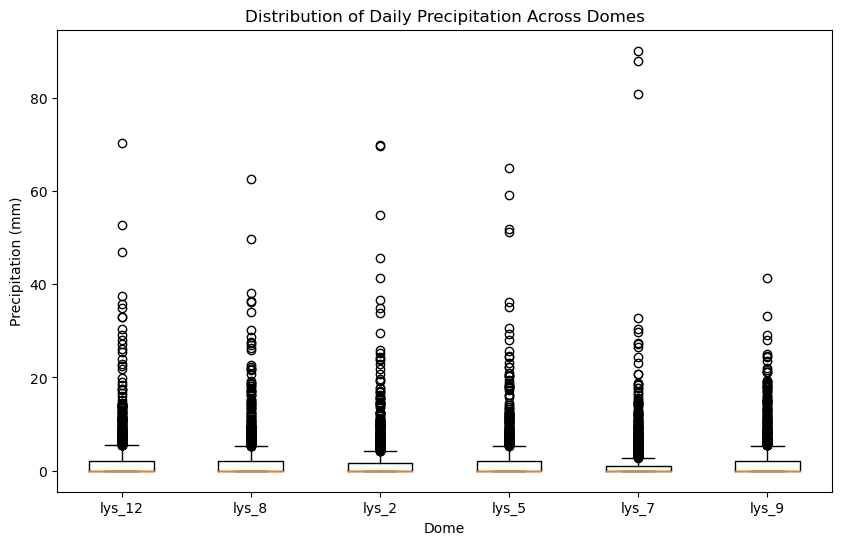

In [45]:
import matplotlib.pyplot as plt

# Assuming daily_precip_data is already defined and contains daily cumulative precipitation data
# Example: daily_precip_data = pd.DataFrame(...)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# List of labels (dome names) for the box plots
dome_labels = daily_precip_data.columns

# Prepare data for each dome for the box plot
boxplot_data = [daily_precip_data[dome].dropna() for dome in dome_labels]

# Plot the box plot
ax.boxplot(boxplot_data, labels=dome_labels)

# Setting title and labels
ax.set_title('Distribution of Daily Precipitation Across Domes')
ax.set_xlabel('Dome')
ax.set_ylabel('Precipitation (mm)')

# Show the plot
plt.show()


# Combine temperature and precipitation daily data together

In [59]:
# Combine temperature and precipitation data, excluding rows with missing values and renaming the precip column
combined_data = {}

for dome in dome_names:
    # Check if the dome is present in both temperature and precipitation data
    if dome in daily_stats and dome in daily_precip_data.columns:
        # Rename the precipitation column to 'precip'
        precip_column = daily_precip_data[[dome]].rename(columns={dome: 'precip'})

        # Combine the temperature data with the renamed precipitation data
        combined_data[dome] = pd.concat([daily_stats[dome], precip_column], axis=1).dropna()

# Now, combined_data contains the combined temperature and precipitation data for each specified dome,
# with the last column correctly labeled as 'precip'


In [60]:
combined_data

{'dome_12':             mean_temp   min_temp   max_temp  precip
 date                                               
 2020-01-01  -0.308231  -2.877667   2.636333   2.146
 2020-01-02   2.432612  -0.578000   6.347119   0.000
 2020-01-03   7.334669   2.714500   9.022500   1.166
 2020-01-04   4.595979   2.260508   6.989833   0.000
 2020-01-05   5.767089   5.087833   6.843333   0.000
 ...               ...        ...        ...     ...
 2023-09-21  14.182778  12.125000  17.506667   1.026
 2023-09-22  12.719306   9.415000  18.255000   1.006
 2023-09-23  11.779861   6.698333  16.748333   0.000
 2023-09-24  13.079792  10.181667  17.556667   1.046
 2023-09-25  13.224467  10.766667  17.103333   1.008
 
 [1364 rows x 4 columns],
 'dome_08':             mean_temp   min_temp   max_temp  precip
 date                                               
 2020-01-01  -0.306772  -2.882712   2.735833   0.000
 2020-01-02   2.415132  -0.619667   6.297000   0.000
 2020-01-03   7.353473   2.655333   9.009833   0.

In [61]:
import pandas as pd

# Define the start dates for each dome
start_dates = {
    'dome_12': '1951-01-01',
    'dome_08': '2011-01-01',
    'dome_02': '2028-01-01',
    'dome_05': '2043-01-01',
    'dome_07': '2067-01-01',
    'dome_09': '2091-01-01'
}

# End date for the entire dataset
end_date = '2099-12-31'

# List to hold the data for all domes
all_dome_data = []

# Adjust the dates for each dome and combine the data
for dome, start_date in start_dates.items():
    if dome in combined_data:
        # Calculate the number of days to shift
        shift_days = (pd.to_datetime(start_date) - combined_data[dome].index[0]).days

        # Shift the index (dates)
        shifted_data = combined_data[dome].set_index(combined_data[dome].index + pd.DateOffset(days=shift_days))

        # Append to the list
        all_dome_data.append(shifted_data)

# Concatenate all dome data
continuous_data = pd.concat(all_dome_data)

# Reindex to cover the full date range and fill missing values with -99.9
full_date_range = pd.date_range(start='1951-01-01', end=end_date)
continuous_data = continuous_data.reindex(full_date_range, fill_value=-99.9)

# Reset the index to add the date column
continuous_data.reset_index(inplace=True)
continuous_data.rename(columns={'index': 'date'}, inplace=True)

# Now, continuous_data contains the merged time series data with the desired columns


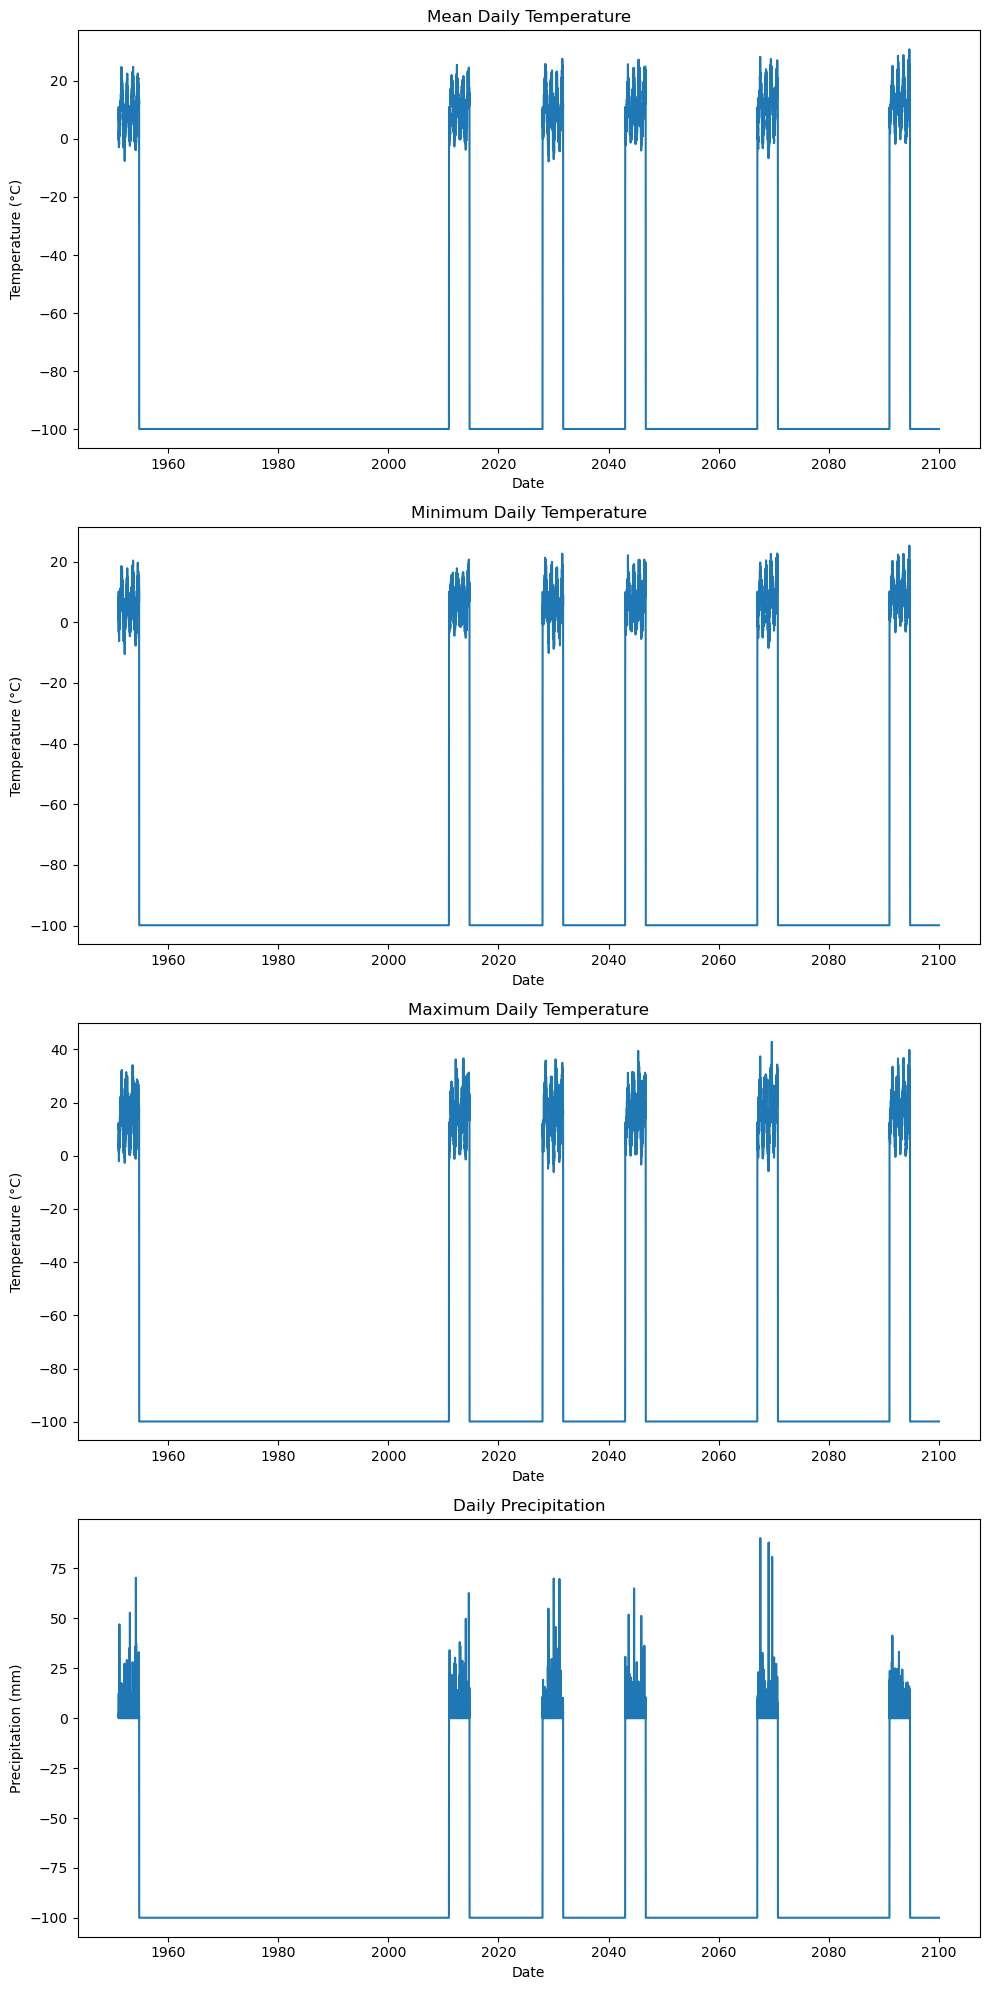

In [63]:
import matplotlib.pyplot as plt

# Assuming continuous_data is defined and contains the columns: 
# 'date', 'mean_temp', 'min_temp', 'max_temp', 'precip'

# Create a figure with subplots - 4 rows, 1 column
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plot mean daily temperature
axs[0].plot(continuous_data['date'], continuous_data['mean_temp'])
axs[0].set_title('Mean Daily Temperature')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Temperature (°C)')

# Plot minimum daily temperature
axs[1].plot(continuous_data['date'], continuous_data['min_temp'])
axs[1].set_title('Minimum Daily Temperature')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Temperature (°C)')

# Plot maximum daily temperature
axs[2].plot(continuous_data['date'], continuous_data['max_temp'])
axs[2].set_title('Maximum Daily Temperature')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Temperature (°C)')

# Plot daily precipitation
axs[3].plot(continuous_data['date'], continuous_data['precip'])
axs[3].set_title('Daily Precipitation')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Precipitation (mm)')

# Adjust layout for better display
plt.tight_layout()
plt.show()


# Save the data in a Climpact compatible format

In [67]:
import pandas as pd

# Assuming continuous_data is defined and contains the columns: 
# 'date', 'mean_temp', 'min_temp', 'max_temp', 'precip'

# Extract year, month, and day from the 'date' column
continuous_data['year'] = continuous_data['date'].dt.year
continuous_data['month'] = continuous_data['date'].dt.month
continuous_data['day'] = continuous_data['date'].dt.day

# Round the precip, max_temp, and min_temp columns
continuous_data['precip'] = continuous_data['precip'].round(1)
continuous_data['max_temp'] = continuous_data['max_temp'].round(1)
continuous_data['min_temp'] = continuous_data['min_temp'].round(1)

# Rearrange and select the necessary columns
final_data = continuous_data[['year', 'month', 'day', 'precip', 'max_temp', 'min_temp']]

# Save the data to a CSV file without header
final_data.to_csv('../data_ecotron/daily_ecotron_data_for_climpact.csv', index=False, header=False)

# Indicate the completion and provide the file path
file_path = '../data_ecotron/data/daily_ecotron_data_for_climpact.csv'
file_path


'../data_ecotron/data/daily_ecotron_data_for_climpact.csv'